Accuracy : 0.3333333333333333


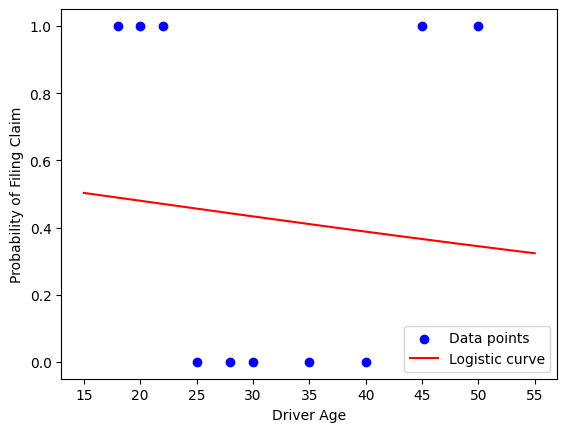

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array([[18],[20],[22],[25],[28],[30],[35],[40],[45],[50]])
y = np.array([1,1,1,0,0,0,0,0,1,1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state = 42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


print("Accuracy :",accuracy_score(y_test,y_pred))

plt.scatter(X,y,color="blue",label = "Data points")
x_range = np.linspace(15,55,200).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]
plt.plot(x_range,y_prob,color="red",label="Logistic curve")
plt.xlabel("Driver Age")
plt.ylabel("Probability of Filing Claim")
plt.legend()
plt.show()

Accuracy : 1.0


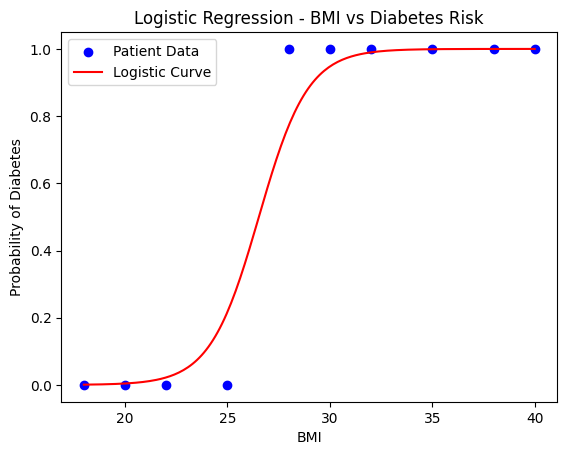

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = pd.read_csv("/content/BMI_dataset - Sheet1.csv")

X = data[['BMI']].values
y = data['Diabetes'].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))

plt.scatter(X, y, color="blue", label="Patient Data")

x_range = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]

plt.plot(x_range, y_prob, color="red", label="Logistic Curve")

plt.xlabel("BMI")
plt.ylabel("Probability of Diabetes")
plt.title("Logistic Regression - BMI vs Diabetes Risk")
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Features: [word_count, has_link, caps_ratio]
X = np.array([
    [50, 1, 0.8],   # SPAM
    [200, 0, 0.1],  # Not spam
    [30, 1, 0.9],   # SPAM
    [180, 0, 0.05], # Not spam
    [10, 1, 0.95],  # SPAM
    [220, 0, 0.08], # Not spam
])
y = np.array([1, 0, 1, 0, 1, 0])  # 1=Spam, 0=Not spam


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
proba=model.predict_proba(X_test)[:,1]

print("Predictions:",y_pred)
print("Probabilities:",proba.round(2))
print("Accuracy:",accuracy_score(y_test,y_pred))

new_mail=[[15,1,0.88]]
print("New email is SPAM?", model.predict(new_mail)[0])




Predictions: [1 0]
Probabilities: [1. 0.]
Accuracy: 1.0
New email is SPAM? 1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=[[5,2,3],[4,1,4],[1,5,2],[2,4,1],[5,1,5],[3,5,1],[1,4,3],[5,3,4],[2,1,4],[3,4,2]]
y=[1,1,0,0,1,0,0,1,1,0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}  Accuracy={acc:.2f}")

# Best model — predict new user
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)
new_user = scaler.transform([[4, 2, 4]])
print("Will they like it?", best_knn.predict(new_user)[0])




K=1  Accuracy=1.00
K=3  Accuracy=1.00
K=5  Accuracy=1.00
Will they like it? 1


In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = pd.read_csv("/content/Fitness_app_dataset - Sheet1.csv")

X = data[["Exercise", "Diet", "Stress"]]
y = data["AtRisk"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}  Accuracy={acc:.2f}")

best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)

new_user = scaler.transform([[4, 3, 4]])
print("Is the person at risk?", best_knn.predict(new_user)[0])


K=1  Accuracy=1.00
K=3  Accuracy=1.00
K=5  Accuracy=0.00
Is the person at risk? 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/University Dataset - Sheet1.csv")

X = df[["HighSchool_GPA", "Exam_Score", "Extracurriculars"]]
y = df["Admission_Label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

model = DecisionTreeClassifier(criterion="gini", max_depth=3)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

new_student = [[8.2, 85, 1]]
print("Admission Decision:", model.predict(new_student)[0])

Accuracy: 0.8333333333333334
Admission Decision: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = [
    [720, 60, 1], [580, 35, 0], [700, 55, 1],
    [600, 40, 1], [750, 80, 1], [500, 25, 0],
    [680, 50, 1], [550, 30, 0], [730, 70, 1],
    [610, 42, 0],
]
y = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

columns = ['Credit_Score', 'Income', 'Employment_Status']
df_X = pd.DataFrame(X, columns=columns)

model = DecisionTreeClassifier(random_state=42)
model.fit(df_X, y)

new_applicant = pd.DataFrame([[650, 45, 1]], columns=columns)
prediction = model.predict(new_applicant)

print(f"Decision for new applicant: {'Approved' if prediction[0] == 1 else 'Rejected'}")

Decision for new applicant: Rejected


Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8
ROC-AUC Score: 0.9600000000000001


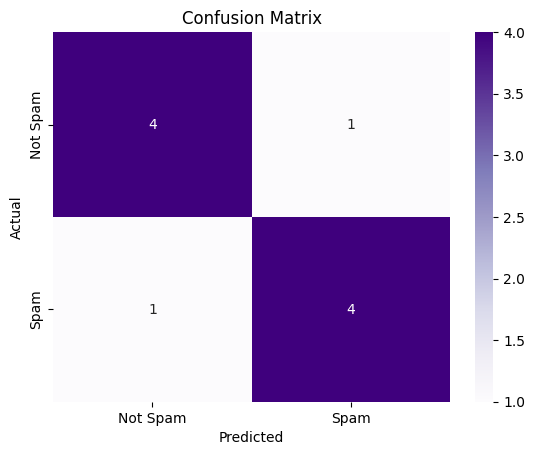

In [ ]:
# Scenario Question: Email Spam Filter
# A company has built a machine learning model to detect spam emails.
# - True labels (y_true): Whether each email was actually spam (1 = Spam, 0 = Not Spam).
# - Predictions (y_pred): What the model guessed.
# - Probabilities (y_prob): How confident the model was in each prediction.
# The company wants to evaluate the model using accuracy, precision, recall, F1 score, ROC-AUC,


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_true = [1,0,1,1,0,1,0,0,1,0]
y_pred = [1,0,1,0,0,1,1,0,1,0]
y_prob = [0.9,0.1,0.8,0.4,0.2,0.85,0.6,0.15,0.7,0.3]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()